#### 분류평가
- 정확도만으로 불균형한 레이블 데이터 세트에서 평가지표로 사용하기에는 부적합
- 정확도가 가지는 분류 평가 지표로의 한계점을 극복하기 위해 여러가지 분류 지표와 함께 적용해야 함

#### Confusion Matrix(혼동행렬,오차행렬)
- 이진분류에서 성능 지표로 잘 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면 얼마나 혼동될 수 있는지도 함께 보여주는 지표
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 보여줌

#### 평가지표
- TP,FP,FN,NP 는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 True/False 는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자는 N/P는 예측 결과값이 부정/긍정을 의미
- 정확도 (TP+TN)/(TP+TN+FP+FN)
- 정밀도 TP / FP+TP (Positive라고 예측한 대상 중에 "실제" 값이 Positive한 데이터의 비율)
- 재현율 TP/ FN+TP ( 실제 값이 Positive인 대상 중에 "예측과 실제 값"이 Positive한 데이터의 비율)
- F1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 높아짐
- 정밀도와 재현율은 Positive데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표 
- 재현율이 중요 지표인 경우: 양성 암 환자에게 음성이라고 고할 때 ,반면 음성인 환자일 경우면 재검사 비용에 그침
    실제 금융사기도 positive인데 Negative로 판단하면 회사의 손실이 클 것 
- 정밀도가 중요 지표인 경우: positive인 스팸메일을 negative인 일반 메일로 분류하면 불편함을 느끼는 정도지만 Negative인 메일은 positive
    인 스팸메일로 분류할 경우 메일을 아예 받지 못하게 될 경우도 있다

#### 정밀도 및 재현율 활용 시 유의사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 P로 예측하고 나머지는 모두 N으로 예측 TP/(TP+FP) = 1 /(1+0) =1
- 재현율 100%가 되는 방법 : 실제 양성 1000명 중 30명 TP/(TP+FN) =  30/30+0 =1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 불만과 불평이 커지게 됨

    

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
#실제값과  y_test 예측값 pred
def def_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1_score:{3:.4f}'.format(accuracy,precision,recall,f1))
    

In [13]:
def_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 15  46]]
정확도:0.8603,정밀도:0.8214,재현율:0.7541,f1_score:0.7863


In [8]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



def fillnas(df):
    def callname(x):
        m = re.compile('[A-Za-z]+[.]')
        p = re.findall(m,x)
        return p[0]
    
    df['Callname']=df.Name.apply(lambda x:callname(x))
    
    df1 = df.loc[df.Age.isnull()]
    age_nulllist = list(set(df1.Callname.values.tolist()))
    
    df2 = df.loc[df.Age.notnull()]
    pivot = pd.pivot_table(df2, index = 'Callname', values = 'Age',aggfunc = 'mean')
    
    for age in age_nulllist:
        df.loc[(df.Age.isnull())&(df.Callname == age),['Age']]=(pivot.loc[age][0])
        
    df['Embarked'].fillna(method = 'ffill',inplace=True)
    
    df3 = df.loc[df.Cabin.notnull()]

    df3['Cabins'] = df3['Cabin'].str[:1]
    df4 = df.loc[df.Cabin.isnull()]
    
    for i in range(1,4):
        df33 = df3.loc[df3.Pclass == i]
        cabin_fill_list=list(set(df33.Cabins.values.tolist()))
        df44 = df4.loc[df4.Pclass == i]
        fill_index = list(df44.index)
        for index in fill_index:
            df.loc[index,'Cabin'] = np.random.choice(cabin_fill_list)
            
    return df

# 불필요 항목 제거
def drop_feat(df):
    df.drop(['PassengerId','Name','Ticket','Callname'],axis=1,inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    scaler = MinMaxScaler()
    scaler.fit(df[['Fare']])
    fare_scaled = scaler.transform(df[['Fare']])
    df['Fare'] = fare_scaled
    
    return df

def transform_features(df):
    df = fillnas(df)
    df = drop_feat(df)
    df = format_features(df)
    return df

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')


t_df = pd.read_csv('../m6_머신러닝알고리즘및이해활용/dataset/train.csv')
y_titanic_df = t_df['Survived']
X_titanic_df =t_df.drop('Survived',axis=1)
X_titanic_df =transform_features(X_titanic_df)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,0.014151,6,2
1,1,0,38.0,1,0,0.139136,2,0
2,3,0,26.0,0,0,0.015469,6,2
3,1,0,35.0,1,0,0.103644,2,2
4,3,1,35.0,0,0,0.015713,5,2


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf = LogisticRegression()
#학습시키기
lr_clf.fit(X_train,y_train)
#예측
pred =lr_clf.predict(X_test)
def_clf_eval(y_test,pred)

#106 실제로 죽었는데 죽었다고 예측한 거 TN
# 12 죽었는데 살았다고 예측한 거 FN
# 15 살았는데 죽었다고 FP
# 46 산사람 살았다고 TP

오차행렬
[[108  10]
 [ 15  46]]
정확도:0.8603,정밀도:0.8214,재현율:0.7541,f1_score:0.7863


In [11]:
#2 * (정밀도 * 재현율) / (정밀도 + 재현율) 
precision=46/12+46
recall = 46/12+46
print('accuracy :',106+46/ (106+12+15+46))
print(f'precision:', 46/12+46)
print(f'recall:', 46/12+46)
print('f1 score:',2*(precision+recall)/(precision+recall))

accuracy : 106.25698324022346
precision: 49.833333333333336
recall: 49.833333333333336
f1 score: 2.0


In [106]:
TN = 106, FN =15, FP= 12,TP =46
# TN-> N/ FP -> N / TP,FN 네거티브인 줄 알았는데 False니깐
accuracy = TP+TN / TN+FN+FP+TP
precision = TP /FP+TP
recall = TP /TP+FN #결과값이 positive인 것 중에 예측값이 POSITIVE였는데 TURE인 것
F1 score 2*


SyntaxError: invalid syntax (<ipython-input-106-eb422793c213>, line 6)

In [19]:
#Precision/Recall Trade-off
pred_proba = lr_clf.predict_proba(X_test)
pred =lr_clf.predict(X_test)
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
pred_proba_result[:3]

array([[0.53915243, 0.46084757, 0.        ],
       [0.88367715, 0.11632285, 0.        ],
       [0.8824417 , 0.1175583 , 0.        ]])

In [20]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]
#임곗값을 기준으로 작거나같으면 0 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
binarizer.fit_transform(X)
#재현율과 정밀도는 각각 케이스에 맞게끔 조정해야된다했지
#임계치를 가지고 조정함

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [21]:
custom_threshold= 0.5
#1열 ->사는 확률 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
pred_proba_1
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict 
def_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 15  46]]
정확도:0.8603,정밀도:0.8214,재현율:0.7541,f1_score:0.7863


In [22]:
#분류결정 임계값 0.5->0.4
custom_threshold= 0.4
#1열 ->사는 확률 

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict 
def_clf_eval(y_test,custom_predict)
#재현율은 올라가고 정밀도는 떨어졌지 

오차행렬
[[98 20]
 [11 50]]
정확도:0.8268,정밀도:0.7143,재현율:0.8197,f1_score:0.7634


In [117]:
threshold=[0.4,0.45,0.50,0.55,0.60]
def get_clf_by_threshold(y_test,pred_proba_1,threshold):
    for i in threshold:
        binarizer = Binarizer(threshold=i).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값:', i)
        def_clf_eval(y_test,custom_predict)
get_clf_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),threshold)


임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361,f1_score:0.7727
임계값: 0.45
오차행렬
[[101  17]
 [ 14  47]]
정확도:0.8268,정밀도:0.7344,재현율:0.7705,f1_score:0.7520
임계값: 0.5
오차행렬
[[104  14]
 [ 14  47]]
정확도:0.8436,정밀도:0.7705,재현율:0.7705,f1_score:0.7705
임계값: 0.55
오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715,정밀도:0.8519,재현율:0.7541,f1_score:0.8000
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771,정밀도:0.8980,재현율:0.7213,f1_score:0.8000


In [111]:
threshold=[0.4,0.45,0.50,0.55,0.60]
def get_clf_by_threshold(y_test,pred_proba_1,threshold):
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값:', custom_threshold)
        def_clf_eval(y_test,custom_predict)
get_clf_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),threshold)

#임곗값은 Positive 예측값을 결정하는 확률의 기준 
# 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True값이 많아진다(재현율 증가)
# 양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수 줄어듬



임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361,f1_score:0.7727
임계값: 0.45
오차행렬
[[101  17]
 [ 14  47]]
정확도:0.8268,정밀도:0.7344,재현율:0.7705,f1_score:0.7520
임계값: 0.5
오차행렬
[[104  14]
 [ 14  47]]
정확도:0.8436,정밀도:0.7705,재현율:0.7705,f1_score:0.7705
임계값: 0.55
오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715,정밀도:0.8519,재현율:0.7541,f1_score:0.8000
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771,정밀도:0.8980,재현율:0.7213,f1_score:0.8000


In [23]:
threshold=[0.4,0.45,0.50,0.55,0.60]

for custom_threshold in threshold:
    binarizer=Binarizer(threshold=custom_threshold,)

In [24]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
#실제값 데이터 세트와 레이블 값이 1일 떄의 예측 확률을 precision_recall_curve 인자로 입력
precision,recalls,threshold = precision_recall_curve(y_test,pred_proba_c1)
print(threshold.shape)
# 반환된 임계값 배열 로우가 142건이므로 샘플로 10건만 추출, 임곗값을 15step으로 추출
thr_index =np.arange(0,threshold.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개',thr_index)
print('샘플용 10개의 임곗값',np.round(threshold[thr_index],2))
# 15 step단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도', np.round(precision[thr_index],3))
print('샘플 임계값별 재현율',np.round(recalls[thr_index],3))

(150,)
샘플 추출을 위한 임계값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 [0.1  0.12 0.13 0.17 0.27 0.35 0.49 0.64 0.77 0.89]
샘플 임계값별 정밀도 [0.396 0.431 0.459 0.528 0.604 0.697 0.77  0.935 0.968 0.938]
샘플 임계값별 재현율 [1.    0.967 0.918 0.918 0.902 0.869 0.77  0.705 0.492 0.246]


[0.098836   0.09883764 0.09898434 0.09900983 0.09901592 0.09927081
 0.10039295 0.100651   0.10162312 0.10216717 0.1067084  0.10810021
 0.1130483  0.11441331 0.11441686 0.11593648 0.11597692 0.11632285
 0.1175583  0.12118526 0.12320748 0.12553086 0.12650225 0.12697044
 0.12744548 0.12869044 0.12885089 0.12967814 0.13102379 0.1315432
 0.13360915 0.13462172 0.13631295 0.13635311 0.13720113 0.13816451
 0.13885523 0.14448014 0.14711907 0.14847546 0.15077897 0.15138775
 0.15170536 0.1564757  0.15721277 0.16640949 0.18414508 0.18597566
 0.19293764 0.20660697 0.2239018  0.22407453 0.22409408 0.2281853
 0.24120358 0.24402249 0.24457537 0.24686362 0.26012342 0.26091717
 0.26519536 0.2739013  0.27855538 0.27910653 0.29244598 0.29805307
 0.30168801 0.30430778 0.30998804 0.3102247  0.34103021 0.34443015
 0.34917428 0.34927495 0.35382994 0.35389881 0.36850875 0.37885844
 0.38885397 0.39279487 0.39452583 0.40286747 0.42659813 0.43014617
 0.4389794  0.45260601 0.45648764 0.46084757 0.46273893 0.486602

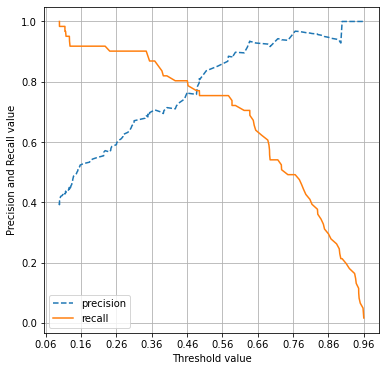

In [25]:
#[과제] 임계값을 0에서 1사이로 변경시킬 때 precision과 recall의 변화 추세를 시각화하여 출력하세요
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# %matplotlib.inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precision,recalls,threshold = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(6,6))
    threshold_boundary= threshold.shape[0]
    print(threshold)
    plt.plot(threshold,precision[0:threshold_boundary],linestyle='--',label ='precision')
    plt.plot(threshold,recalls[0:threshold_boundary],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print(f'f1 score :{round(f1,4)}')

f1 score :0.7863


#### ROC Curve 와 AUC
- 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR = 1-TNR(특이성), TRP은 재현율(민감도)를 나타냄
- TNR = TN/(TN+FP) 이며 FPR = FP/(TN+FP)
- ROC곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR의 변화 값을 구함
- FPR을 0에서 1까지 변경하는 것은 p예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨
- FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정

In [ ]:
NEGATIVE로 예측을 많이해야 fN이 커진다 FALSE NEGATIVE 
임계값이 커지면 NEGATIVE많이지는 것 임계값이 작아지면 POSITIVE가 많아지겠지
그래서 
임계값이 변함에따라 양성 예측을 후하게 하느냐 덜하느냐 정할 수 있다
f행과 fp에 대한 변화를 줬잖아
positive를 많이 예측하고 덜 예측하고가 임계값에서 적응되니깐
임계값이 낮으면 낮을수록 
임계값이 높아지면 재현율이 떨어지지 이것일 때 분모의 값이 뭐야 FN -> negative를 많이하고, positive 예측을 적게하잖아
임계치가 올라가면 positive 예측을 적게하는 것 , 임계치가 내려가면 positive예측을 많이하는 것임
임계치가 많아지면 TRP과 FPR이 변하는데 그걸 나타내는게 ROC야 TRP이란게 뭐랬지 TURE POSITIVE RATE 실제가 파즈티브 => TP+FN분모가
TPR,FPR, 임계치에 따라 달라지잖아 
TPR민감율 재현율,민감도 실제 P인데 예측도 P하면 좋잖아 AUC가 1에 가까워지면 좋은거야
FPR 실제가 음성인데 긍정으로 예측한 거 , 작으면 작을수록 좋지
임계값 낮추면 양성 예측 많 TPR FPR변동하는데 그걸 곡선으로 표현한 것
임계치에 따라 변화하는 곡선에 아래 면적을 가지고서 얼마나 모델이 정확하게 분류하는지 평가하는 지표


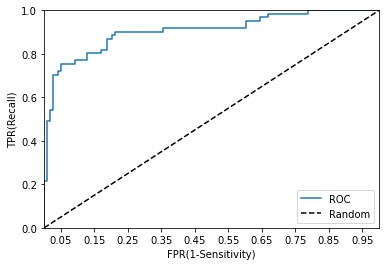

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

def roc_curve_plot(y_test,pred_proba_c1):
    
    fprs,tprs,threshold = roc_curve(y_test,pred_proba_c1)
    threshold #임곗값
    # roc_curver가 드레시 홀드의 다양한 값을 가지고 있어 , fpr tpr어떻게 변하는지 알려주는 게 rou 곡선이야
    # proba라는 친구는 1일확률 0일확률 두개를 가지고 있지 ,선택을 해주는데 기준이 되는게
    # roc_curve 임계치변하는 거에 따라 변화는 곡선 보여주는 기능
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start,end =plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

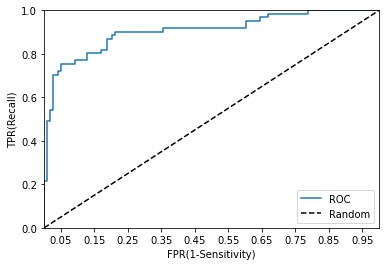

In [27]:
roc_curve_plot(y_test,pred_proba_c1)

In [28]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('roc_score:{0:.4f}'.format(roc_score))
round(roc_score,4)


roc_score:0.9058


0.9058

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
#실제값과  y_test 예측값 pred
def def_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    rou_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1_score:{3:.4f},rou_auc:{4:.4f}'.format(accuracy,precision,recall,f1,
                                                                                       rou_auc))
    

In [30]:
def_clf_eval(y_test,pred,pred_proba)

오차행렬
[[108  10]
 [ 15  46]]
정확도:0.8603,정밀도:0.8214,재현율:0.7541,f1_score:0.7863,rou_auc:0.9058


[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가  
※ 피처 정보
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린), 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'


데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.   
고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생  
[과제] train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- dt 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
- accuracy에 추가하여 confusion matrix, accuracy, precision, recall, roc auc score 평가


In [95]:
df = pd.read_csv('./dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.metrics import roc_curve
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1:{3:.4f},rou_auc:{4:.4f}'.format(accuracy,precision,recall,f1,
                                                                                   roc_auc))
    

In [103]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
#stratify : 지정한 Data의 비율을 유지한다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)


오차행렬
[[89 11]
 [20 34]]
정확도:0.7987,정밀도:0.7556,재현율:0.6296,f1:0.6869,rou_auc:0.8402


[0.01673594 0.02178566 0.03586022 0.04204907 0.04523531 0.05199438
 0.05476006 0.05805039 0.05811646 0.0655674  0.06594506 0.06623792
 0.06752703 0.06794889 0.06815045 0.06948284 0.07473041 0.07987753
 0.08305282 0.0848258  0.08554636 0.08960646 0.09016028 0.09203513
 0.0968859  0.09993289 0.10165552 0.10231799 0.10245299 0.10302921
 0.10485274 0.10781511 0.11170116 0.11280242 0.1214564  0.12719563
 0.13035913 0.13511205 0.13719035 0.13987397 0.14005628 0.14212499
 0.14397265 0.1510494  0.15173093 0.15494979 0.1556024  0.15878473
 0.16083674 0.16302621 0.16519667 0.17038399 0.18055219 0.19513186
 0.19731006 0.19943946 0.20077783 0.2038362  0.20550511 0.20675389
 0.20836594 0.210814   0.21429429 0.22741392 0.23133813 0.23901508
 0.25119413 0.2530158  0.2550398  0.26225378 0.26724    0.27296756
 0.27899682 0.28099753 0.28335226 0.29485322 0.30148801 0.31266462
 0.31510451 0.31557699 0.32401824 0.33028304 0.33911179 0.33977275
 0.34285591 0.34348604 0.34912057 0.3505978  0.352274   0.3579

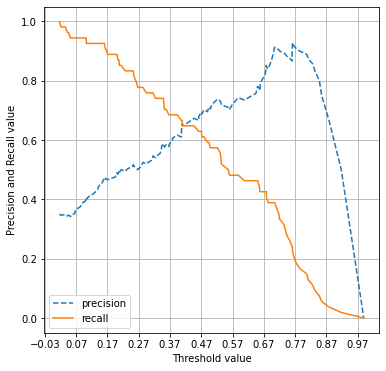

In [98]:
#전체 데이터의 65%가 negative => 재현율 성능에 초점
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)
# 임계값이 0.42정도에 어느 정도 균형을 맞춤
#그러나 0.7도 안됨.

In [ ]:
df.describe()

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

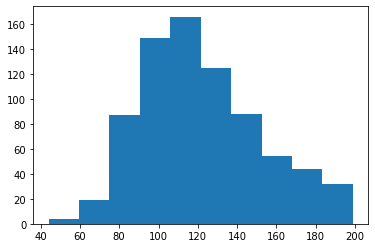

In [104]:
plt.hist(df['Glucose'],bins=10)

In [105]:
#0값 검사할 컬럼
zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
#전체 데이터 건수
total_count = df['Glucose'].count()

#컬럼별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for i in zero:
    zero_count = df[df[i]==0][i].count()
    print('{0} 0 건수는 {1},퍼센트 {2:.2f}%'.format(i,zero_count,100*zero_count/total_count))

Glucose 0 건수는 0,퍼센트 0.00%
BloodPressure 0 건수는 0,퍼센트 0.00%
SkinThickness 0 건수는 0,퍼센트 0.00%
Insulin 0 건수는 0,퍼센트 0.00%
BMI 0 건수는 0,퍼센트 0.00%


In [107]:
mean_zero = df[zero].mean()
df[zero] = df[zero].replace(0,mean_zero)
df.Glucose.describe()  

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [115]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)
#재현율 수치 개선 여전히 필요해보임

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987,정밀도:0.7674,재현율:0.6111,f1:0.6804,rou_auc:0.8433


In [110]:
from sklearn.preprocessing import Binarizer
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [116]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1:{3:.4f},rou_auc:{4:.4f}'.format(accuracy,precision,recall,f1,
                                                                                   roc_auc))

In [117]:
threshold=[0.4,0.45,0.50,0.55,0.60]
def get_eval_by_threshold(y_test,pred_proba_1,threshold):
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값:', custom_threshold)
        gef_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),threshold)
# get_clf_by_threshold(y_test,pred_proba_1,threshold)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [111]:
#predict_proba = > 데이터별로 예측 확률 
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

NameError: name 'get_eval_by_threshold' is not defined

In [118]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
#실제값과  y_test 예측값 pred
def gef_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    rou_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1_score:{3:.4f},rou_auc:{4:.4f}'.format(accuracy,precision,recall,f1,
                                                                                       rou_auc))
    

In [119]:
binarizer = Binarizer(threshold=0.48)

pred_th_048= binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
gef_clf_eval(y_test,pred_th_048,pred_proba[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

[과제] train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- dt 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
- accuracy에 추가하여 confusion matrix, accuracy, precision, recall, roc auc score 평가


In [48]:
tdf = pd.read_csv('../m6_머신러닝알고리즘및이해활용/dataset/train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
tdf = pd.read_csv('../m6_머신러닝알고리즘및이해활용/dataset/train.csv')
y_titanic_df =tdf['Survived']
X_titanic_df= tdf.drop('Survived',axis=1)

In [50]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



def fillnas(df):
    def callname(x):
        m = re.compile('[A-Za-z]+[.]')
        p = re.findall(m,x)
        return p[0]
    
    df['Callname']=df.Name.apply(lambda x:callname(x))
    
    df1 = df.loc[df.Age.isnull()]
    age_nulllist = list(set(df1.Callname.values.tolist()))
    
    df2 = df.loc[df.Age.notnull()]
    pivot = pd.pivot_table(df2, index = 'Callname', values = 'Age',aggfunc = 'mean')
    
    for age in age_nulllist:
        df.loc[(df.Age.isnull())&(df.Callname == age),['Age']]=(pivot.loc[age][0])
        
    df['Embarked'].fillna(method = 'ffill',inplace=True)
    
    df3 = df.loc[df.Cabin.notnull()]

    df3['Cabins'] = df3['Cabin'].str[:1]
    df4 = df.loc[df.Cabin.isnull()]
    
    for i in range(1,4):
        df33 = df3.loc[df3.Pclass == i]
        cabin_fill_list=list(set(df33.Cabins.values.tolist()))
        df44 = df4.loc[df4.Pclass == i]
        fill_index = list(df44.index)
        for index in fill_index:
            df.loc[index,'Cabin'] = np.random.choice(cabin_fill_list)
            
    return df

# 불필요 항목 제거
def drop_feat(df):
    df.drop(['PassengerId','Name','Ticket','Callname'],axis=1,inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    scaler = MinMaxScaler()
    scaler.fit(df[['Fare']])
    fare_scaled = scaler.transform(df[['Fare']])
    df['Fare'] = fare_scaled
    
    return df

def transform_features(df):
    df = fillnas(df)
    df = drop_feat(df)
    df = format_features(df)
    return df

In [51]:
import numpy as np
titanic_df = pd.read_csv('../m6_머신러닝알고리즘및이해활용/dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)


In [54]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
                                               
dtree= DecisionTreeClassifier(random_state=11)
parameters = {'max_depth':[2,3,5,8], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_cv =GridSearchCV(dtree,param_grid =parameters,scoring='accuracy',cv=5,refit=True)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최적 파라미터',grid_cv.best_params_)
print('GridSearchCV 최고 정확도',grid_cv.best_score_)
best_cv = grid_cv.best_estimator_
pred = best_cv.predict(X_test)
print('정확도:',accuracy_score(y_test,pred))
# pd.DataFrame(grid_dtree.cv_results_)

GridSearchCV 최적 파라미터 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도 0.8202206244459764
정확도: 0.8212290502793296


In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.metrics import roc_curve
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1:{3:.4f},rou_auc:{4:.4f}'.format(accuracy,precision,recall,f1,
                                                                                   roc_auc))


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

t_df = pd.read_csv('../m6_머신러닝알고리즘및이해활용/dataset/train.csv')
y_t_df= t_df['Survived']
X_t_df = t_df.drop('Survived',axis=1)
X_t_df = transform_features(X_t_df)

X_train,X_test,y_train,y_test = train_test_split(X_t_df,y_t_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)
get_clf_eval(y_test,pred,pred_proba)


ValueError: Found input variables with inconsistent numbers of samples: [179, 154]

In [ ]:
임계값 낮추면 양성 예측 많 TPR FPR변동하는데 그걸 곡선으로 표현한 것